In [1]:
[1]
'''
将训练数据和检测数据加载到内存中(第一次运行需要下载数据，会比较慢):
train_images是用于训练系统的手写数字图片;
train_labels是用于标注图片的信息;
test_images是用于检测系统训练效果的图片；
test_labels是test_images图片对应的数字标签。
'''
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('train_images.shape = ',train_images.shape)
print('tran_labels = ', train_labels)
print('test_images.shape = ', test_images.shape)
print('test_labels', test_labels)
'''
1.train_images.shape打印结果表明，train_images是一个含有60000个元素的数组.
数组中的元素是一个二维数组，二维数组的行和列都是28.
也就是说，一个数字图片的大小是28*28.
2.train_lables打印结果表明，第一张手写数字图片的内容是数字5，第二种图片是数字0，以此类推.
3.test_images.shape的打印结果表示，用于检验训练效果的图片有10000张。
4.test_labels输出结果表明，用于检测的第一张图片内容是数字7，第二张是数字2，依次类推。
'''



11493376/11490434 [==============================] - 2s 0us/step
train_images.shape =  (60000, 28, 28)
tran_labels =  [5 0 4 ... 5 6 8]
test_images.shape =  (10000, 28, 28)
test_labels [7 2 1 ... 4 5 6]


'\n1.train_images.shape打印结果表明，train_images是一个含有60000个元素的数组.\n数组中的元素是一个二维数组，二维数组的行和列都是28.\n也就是说，一个数字图片的大小是28*28.\n2.train_lables打印结果表明，第一张手写数字图片的内容是数字5，第二种图片是数字0，以此类推.\n3.test_images.shape的打印结果表示，用于检验训练效果的图片有10000张。\n4.test_labels输出结果表明，用于检测的第一张图片内容是数字7，第二张是数字2，依次类推。\n'

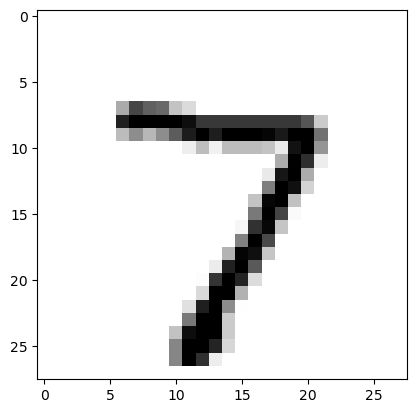

In [2]:
[2]
'''
把用于测试的第一张图片打印出来看看
'''
digit = test_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()



In [3]:
[3]
'''
使用tensorflow.Keras搭建一个有效识别图案的神经网络，
1.layers:表示神经网络中的一个数据处理层。(dense:全连接层)
2.models.Sequential():表示把每一个数据处理层串联起来.
3.layers.Dense(…):构造一个数据处理层。
4.input_shape(28*28,):表示当前处理层接收的数据格式必须是长和宽都是28的二维数组，
后面的“,“表示数组里面的每一个元素到底包含多少个数字都没有关系.
'''
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy',
               metrics=['accuracy'])
      


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
[4]               
'''
在把数据输入到网络模型之前，把数据做归一化处理:
1.reshape(60000, 28*28）:train_images数组原来含有60000个元素，每个元素是一个28行，28列的二维数组，
现在把每个二维数组转变为一个含有28*28个元素的一维数组.
2.由于数字图案是一个灰度图，图片中每个像素点值的大小范围在0到255之间.
3.train_images.astype(“float32”)/255 把每个像素点的值从范围0-255转变为范围在0-1之间的浮点值。
'''
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

'''
把图片对应的标记也做一个更改：
目前所有图片的数字图案对应的是0到9。
例如test_images[0]对应的是数字7的手写图案，那么其对应的标记test_labels[0]的值就是7。
我们需要把数值7变成一个含有10个元素的数组，然后在第8个元素设置为1，其他元素设置为0。
例如test_lables[0] 的值由7转变为数组[0,0,0,0,0,0,0,1,0,0] ---one hot
'''
from tensorflow.keras.utils import to_categorical
print("before change:" ,test_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("after change: ", test_labels[0])



before change: 7
after change:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [5]:
[5]
'''
把数据输入网络进行训练：
train_images：用于训练的手写数字图片；
train_labels：对应的是图片的标记；
batch_size：每次网络从输入的图片数组中随机选取128个作为一组进行计算。
epochs:每次计算的循环是五次
'''
network.fit(train_images, train_labels, epochs=5, batch_size = 128)




Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2562 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1027 - acc: 0.9700
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0681 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0498 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0373 - acc: 0.9887


In [6]:
[6]
'''
测试数据输入，检验网络学习后的图片识别效果.
识别效果与硬件有关（CPU/GPU）.
'''
test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=1)
print(test_loss) 
print('test_acc', test_acc)



10000/10000 [==============================] - 0s 23us/sample - loss: 0.0674 - acc: 0.9806
0.06737897322392092
test_acc 0.9806


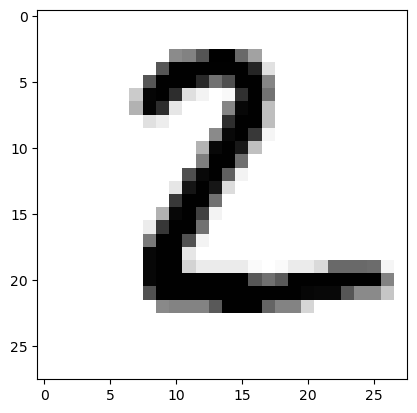

the number for the picture is :  2


In [7]:
[7]
'''
输入一张手写数字图片到网络中，看看它的识别效果
'''
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = test_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
test_images = test_images.reshape((10000, 28*28))
res = network.predict(test_images)

for i in range(res[1].shape[0]):
    if (res[1][i] == 1):
        print("the number for the picture is : ", i)
        break
